# MNIST Dataset - Handwritten Digits Recognition

**The objective of this study is to perform image recognition on handwritten digits.**

**We will be answering the following questions :**
- What is the best performing model ? 
- Will the models recognize our own hadwriting ? 
- What is the best model to generate new data ?
- Will you be able to distinguish fake from real data ?

**List of algorithms that we will compare :**
- Liner Classifier 
- KNN
- SVMs
- Neural Nets 
- Convolutional Neural Nets
- GAN / VAE

## Import the data

In [2]:
!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9680k  100 9680k    0     0  1702k      0  0:00:05  0:00:05 --:--:-- 2030k


In [3]:
!gunzip t*-ubyte.gz

In [ ]:
#!pip install mlxtend

In [4]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt

import os

In [5]:
os.getcwd()

'/Users/marielaval/Documents/Polytechnique/Cours/Semester 2/Python/MNIST Handwritten Digits Recognition'

In [8]:
X_train, y_train = loadlocal_mnist(
        images_path='data/train-images-idx3-ubyte', 
        labels_path='data/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(images_path = 'data/t10k-images-idx3-ubyte', 
                                labels_path = 'data/t10k-labels-idx1-ubyte')

In [9]:
print('Dimensions: %s x %s' % (X_train.shape[0], X_train.shape[1]))
print('\n1st row', X_train[0])

Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 1

In [10]:
print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y_train))
print('Class distribution: %s' % np.bincount(y_train))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

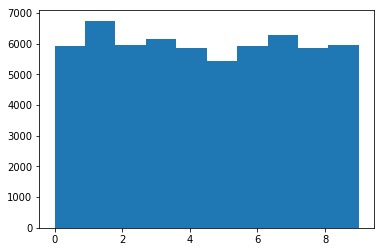

In [11]:
plt.hist(y_train)

In [12]:
#Store as CSV files
np.savetxt(fname='images_train.csv', 
           X=X_train, delimiter=',', fmt='%d')
np.savetxt(fname='labels_train.csv', 
           X=y_train, delimiter=',', fmt='%d')

In [12]:
np.savetxt(fname='images_test.csv', 
           X=X_test, delimiter=',', fmt='%d')
np.savetxt(fname='labels_test.csv', 
           X=y_test, delimiter=',', fmt='%d')

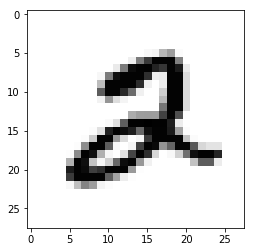

In [13]:
#Show first digit 
pixels = X_train[5].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

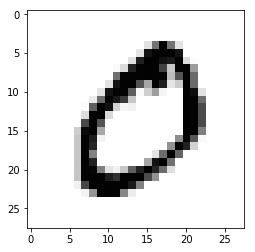

In [14]:
pixels = X_train[1].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

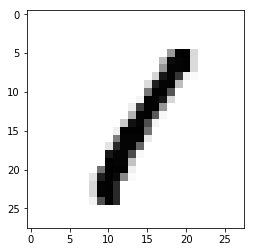

In [11]:
pixels = X_train[3].reshape((28,28))
plt.imshow(pixels, cmap = 'Greys')

## Reshaping and Normalizing the images

In [7]:
#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (60000, 28, 28, 1)
Number of images in X_train 60000
Number of images in X_test 10000


## CNN

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adadelta

In [21]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))



In [27]:
model.compile(optimizer="Adadelta",
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=X_train,y=y_train, epochs=5)

Epoch 1/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.0088 - acc: 0.9970
Epoch 2/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0060 - acc: 0.9983
Epoch 3/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0049 - acc: 0.9985
Epoch 4/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.0041 - acc: 0.9987
Epoch 5/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0044 - acc: 0.9986
Epoch 6/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.0034 - acc: 0.9990
Epoch 7/10
60000/60000 [==============================] - 21s 347us/step - loss: 0.0037 - acc: 0.9988
Epoch 8/10
60000/60000 [==============================] - 21s 348us/step - loss: 0.0033 - acc: 0.9990
Epoch 9/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.0028 - acc: 0.9992
Epoch 10/10
60000/60000 [==============================] - 21s 352us/step - loss: 

In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 131us/step


[0.06075223159406305, 0.9878]

Prediction error : 98,5%


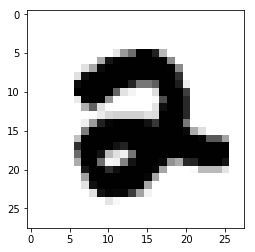

In [29]:
image_index = 222
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')

In [30]:
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

2


## SVM

**To do** : With some classification methods (particuarly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass.

In [1]:
from sklearn import datasets, svm, metrics
import pandas as pd
import numpy as np

In [3]:
images_train = pd.read_csv("images_train.csv")
labels_train = np.ravel(pd.read_csv("labels_train.csv"))
images_test = pd.read_csv("images_test.csv")
labels_test = np.ravel(pd.read_csv("labels_test.csv"))


In [7]:
np.ravel(labels_train)


array([0, 4, 1, ..., 5, 6, 8])

In [4]:
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)

In [ ]:
classifier.fit(images_train, labels_train)

In [ ]:
predicted = classifier.predict(data_test)

In [ ]:
classifier.evaluate(images_test, labels_test)

## K Nearest Neighbors

In [8]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
#import imutils
import cv2
import matplotlib.pyplot as plt

images_train, labels_train = X_train, y_train 

images_test, labels_test = X_test, y_test 


In [7]:
# now, let's take 10% of the training data and use that for validation

(images_train1, valData, labels_train1, valLabels) = train_test_split(images_train, labels_train,
test_size=0.1, random_state=84)

# show the sizes of each data split

print("training data points: {}".format(len(images_train1)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(labels_test)))

training data points: 54000
validation data points: 6000
testing data points: 10000


In [ ]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 20, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(images_train1, labels_train1)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
        

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))

k=1, accuracy=97.48%
k=3, accuracy=97.62%
k=5, accuracy=97.28%
k=7, accuracy=97.10%
k=9, accuracy=97.03%
k=11, accuracy=97.03%
k=13, accuracy=96.77%
k=15, accuracy=96.60%


In [ ]:
# re-train our classifier using the best k value and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(images_train, labels_train)
predictions = model.predict(images_test)
#print(predictions[1])

In [ ]:
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("EVALUATION ON TESTING DATA")
print(classification_report(labels_test, predictions))

## Neural Nets 

## Input our own images

In [ ]:
#https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4

## GAN